<a href="https://colab.research.google.com/github/RandDahmash/Mining-project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('students_adaptability_level_online_education.csv')
df=pd.DataFrame(data)





In [ ]:
#Statistical summries
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


From the statistical summary, we can see for each attribute how many entries there are (count), how many different categories exist (unique), which value appears the most (top), and how many times it appears (freq). This helps me notice which values are the most common, like the most used device or the most frequent institution type.


In [ ]:
#Missing values , we do not have missing values
df.isnull().sum()

,0
Gender,0
Age,0
Education Level,0
Institution Type,0
IT Student,0
Location,0
Load-shedding,0
Financial Condition,0
Internet Type,0
Network Type,0


The dataset contains no missing values in any column (all 1205 rows × 14 attributes are complete). Therefore, no imputation or deletion of missing data is required at this stage.

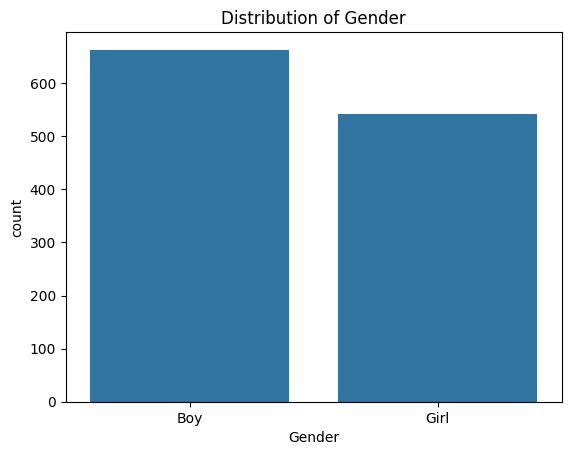

In [6]:
#Bar-plot for Gender attribute
sns.countplot(x='Gender',data=df)
plt.title("Distribution of Gender")
plt.show()

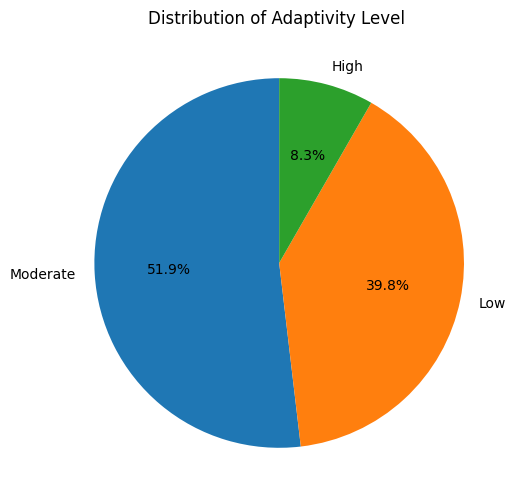

In [8]:
#class lable distribution

counts = df["Adaptivity Level"].value_counts()
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of Adaptivity Level ")
plt.ylabel(' ')
plt.show()

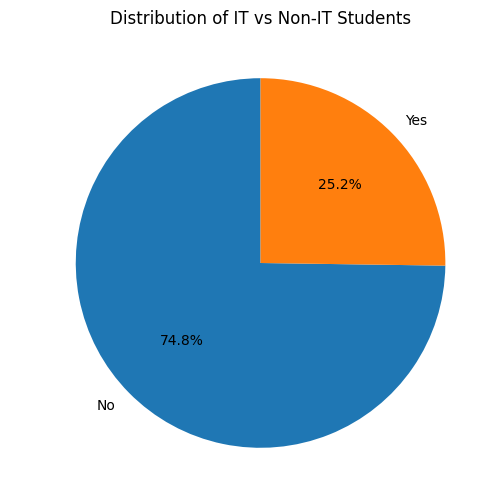

In [ ]:
# Count values for IT Student
counts = df["IT Student"].value_counts()

# Pie chart
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of IT vs Non-IT Students")
plt.ylabel(' ')
plt.show()

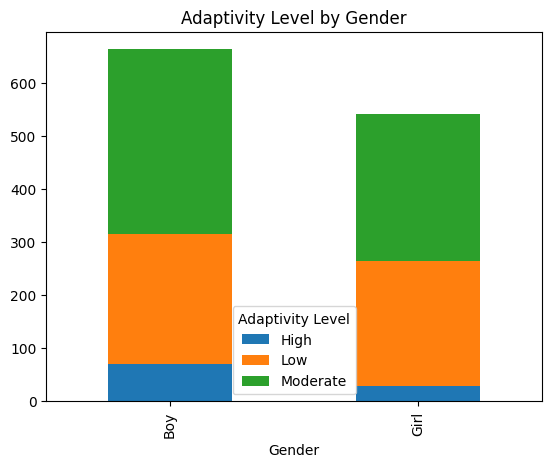

In [2]:
pd.crosstab(df["Gender"], df["Adaptivity Level"]).plot(kind="bar", stacked=True)
plt.title("Adaptivity Level by Gender")
plt.show()

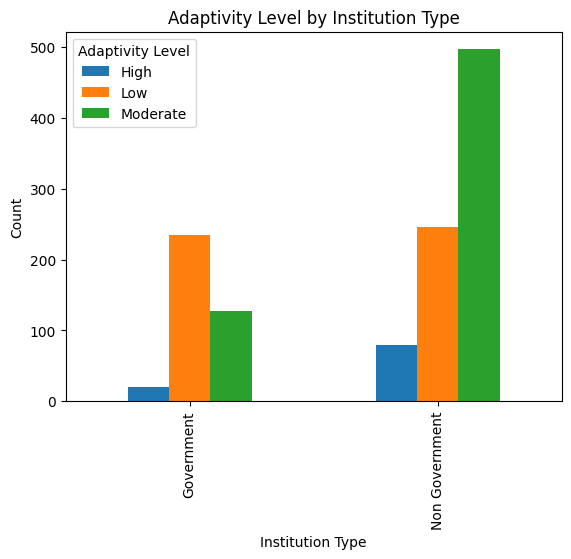

In [4]:
pd.crosstab(df["Institution Type"], df["Adaptivity Level"]).plot(kind="bar")
plt.title("Adaptivity Level by Institution Type")
plt.ylabel("Count")
plt.show()